# Gradient Descent vs Heavy Ball (Gradient Descent with Momentum)

This exercise focuses on understanding the behavior of momentum methods on quadratic functions and illustrate the benefits of well condition number dependence. 

## Part A: L=1, m=0.1, starting at (20,20)

## Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')
from mpl_toolkits import mplot3d
from sklearn.linear_model import LinearRegression

In [2]:
#from inclass GD demo
def Gradient_Descent(Grad,x0,y0, l, m, gamma, epsilon, max_iter):
    """
    We are going to code up a basic implementation of gradient descent for a 2D
    function. The variables (x, y) represent the x and y axes, i.e., the
    two variables on which the quadratic is defined. Grad is the gradient, defined
    as a function of two variables.
    
    IMPORTANT: epsilon here is NOT the distance to optimal solution. If is the amount of
    progress made between iterations is less than epsilon, this presents a stopping criterion.
    
    Outputs: (final_iter, iterates_x, iterates_y, number_iterations)
    """
    
    #Initialization is given by (x0, y0)
    x, y = x0, y0
    i = 0

    iter_x, iter_y, iter_count = np.empty(0),np.empty(0), np.empty(0)
    error_red = 10 #Measures reduction of error over iterations. Make sure this is greater than epsilon
    X = np.array([x,y])
    
    
    #Looping as long as error is greater than epsilon; max_iter ensures you don't go on forever
    #make sure it is 2 norm squared
    while np.linalg.norm(error_red)**2 > epsilon and i < max_iter:
        i +=1
        iter_x = np.append(iter_x,x)
        iter_y = np.append(iter_y,y)
        iter_count = np.append(iter_count ,i)   
        
        X_prev = X
        X = X - gamma * Grad(x,y,l,m)
        error_red = X - X_prev
        x,y = X[0], X[1]
          
    return X, iter_x,iter_y, iter_count

In [3]:
def f(x, y, l, m):
    return (l/2)*(x**2) + (m/2)*(y**2)
                                
def Grad_f(x, y, l, m):
    g1 = l*x
    g2 = m*y
    return np.array([g1,g2])

#Given parameters: L=1, m=0.1, (20,20)
l = 1
m = 0.1
x=20
y=20

gamma_GD = 2/(l + m)


it, iter_x, iter_y, iter_count = Gradient_Descent(Grad_f,20, 20, 1, 0.1, gamma_GD, 0, 1000) 

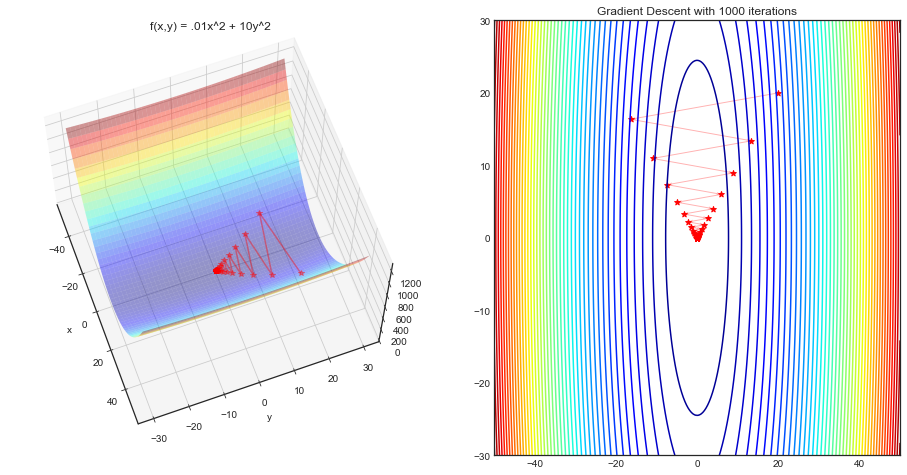

In [4]:
x = np.linspace(-50,50,250)
y = np.linspace(-30,30,250)
X, Y = np.meshgrid(x, y)
Z = f(X, Y,l,m)

#Angles needed for quiver plot
anglesx = iter_x[1:] - iter_x[:-1]
anglesy = iter_y[1:] - iter_y[:-1]

fig = plt.figure(figsize = (16,8))

#Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X,Y,Z,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
ax.plot(iter_x,iter_y, f(iter_x,iter_y,l,m),color = 'r', marker = '*', alpha = .4)
ax.set_title('f(x,y) = .01x^2 + 10y^2')


ax.view_init(65, 340)
ax.set_xlabel('x')
ax.set_ylabel('y')


#Contour plot
ax = fig.add_subplot(1, 2, 2)
ax.contour(X,Y,Z, 50, cmap = 'jet')
#Plotting the iterations and intermediate values
ax.scatter(iter_x,iter_y,color = 'r', marker = '*')
ax.quiver(iter_x[:-1], iter_y[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)
ax.set_title('Gradient Descent with {} iterations'.format(len(iter_count)))

plt.show()

The function is very "flat" along one of the directions, and the condition number is very large. Gradient descent is able to quickly minimizes the function along the y-direction due to the curvature, but takes a long time to minimize along the x-direction die to its "bouncing" nature.

## Heavy Ball

In [5]:
def heavy_ball(Grad, x0, y0, l, m, gamma, theta, epsilon, max_iter):
    #Initialization starting point given by (x0, y0)
    x = x0
    y = y0
    iter_x, iter_y, iter_count = np.empty(0),np.empty(0), np.empty(0)
    error = 10 
    
    #Keep track of iterations
    X = np.array([x,y])
    iterations = [np.array([0,0]),np.array([x,y])]
    
    #Iterate if error > epsilon or until max iterations are hit
    for i in range(max_iter):
        if (np.linalg.norm(error))**2 <= epsilon:
            break
        else:
            i+=1
            iter_x = np.append(iter_x,x)
            iter_y = np.append(iter_y,y)
            iter_count = np.append(iter_count ,i)   
        
            # X_i and X_(i-1) used in Heaby Ball Method
            X_prev = X
            X_iter_prev = iterations[i-1]
            #Heavy Ball Method
            X = X - (gamma * Grad(x,y,l,m)) + (theta * (X - X_iter_prev))
            error = X - X_prev
            x = X[0]
            y = X[1]
            iterations.append(X)
          
    return X, iter_x,iter_y, iter_count

In [6]:
#Given parameters: L=1, m=0.1, (20,20)
l= 1
m= 0.1
k = l/m
x=20
y=20

gamma_HB = 4/((np.sqrt(l) + np.sqrt(m))**2)
theta = ((np.sqrt(k)-1)/(np.sqrt(k)+1))**2

final_iter, iter_x, iter_y, iter_count = heavy_ball(Grad_f, x, y, l, m, gamma_HB, theta, 0, 1000) 

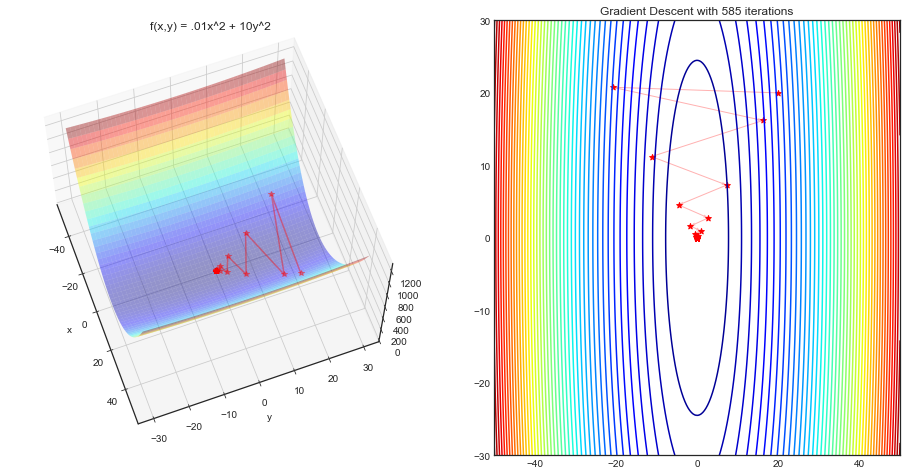

In [7]:
x = np.linspace(-50,50,250)
y = np.linspace(-30,30,250)
X, Y = np.meshgrid(x, y)
Z = f(X, Y,l,m)

#Angles needed for quiver plot
anglesx = iter_x[1:] - iter_x[:-1]
anglesy = iter_y[1:] - iter_y[:-1]

fig = plt.figure(figsize = (16,8))

#Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X,Y,Z,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
ax.plot(iter_x,iter_y, f(iter_x,iter_y,l,m),color = 'r', marker = '*', alpha = .4)
ax.set_title('f(x,y) = .01x^2 + 10y^2')


ax.view_init(65, 340)
ax.set_xlabel('x')
ax.set_ylabel('y')


#Contour plot
ax = fig.add_subplot(1, 2, 2)
ax.contour(X,Y,Z, 50, cmap = 'jet')
#Plotting the iterations and intermediate values
ax.scatter(iter_x,iter_y,color = 'r', marker = '*')
ax.quiver(iter_x[:-1], iter_y[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)
ax.set_title('Gradient Descent with {} iterations'.format(len(iter_count)))

plt.show()

Comparing the 2 methods with the same parameters L=1, m=0.1 starting at (20,20) - Gradient Descent takes the full 1000 iterations where as Heavy Ball takes 585 iterations. This shows that the Heavy Ball Method is more efficient and the usefullness of adding momentum.

# Part B: epsilon = 10^(-2) and epsilon = 10^(-4)

## Gradient Descent: epsilon = 10^(-2)

In [8]:
final_iter, iter_x, iter_y, iter_count_g1 = Gradient_Descent(Grad_f, 20, 20, 1, 0.1, gamma_GD, 0.01, 100)
print(gamma_GD)
print('k with gradient descent:', iter_count_g1[-1])

1.8181818181818181
k with gradient descent: 31.0


## Heavy Ball: epsilon = 10^(-2)

In [9]:
final_iter, iter_x, iter_y, iter_count_h1 = heavy_ball(Grad_f,20, 20, 1, 0.1, gamma_HB, theta, 0.01, 100) 
print('k with heavy ball:', iter_count_h1[-1])

k with heavy ball: 14.0


## Gradient Descent: epsilon = 10^(-4)

In [10]:
final_iter, iter_x, iter_y, iter_count_g1 = Gradient_Descent(Grad_f, 20, 20, 1, 0.1, gamma_GD, 0.0001, 100)
print('k with gradient descent:', iter_count_g1[-1])

k with gradient descent: 42.0


## Heavy Ball: epsilon = 10^(-4)

In [11]:
final_iter, iter_x, iter_y, iter_count_h1 = heavy_ball(Grad_f,20, 20, 1, 0.1, gamma_HB, theta, 0.0001, 100) 
print('k with heavy ball:', iter_count_h1[-1])

k with heavy ball: 18.0


## Observations for part b:
Similar to part a, momentum is taking fewer iteration to reach convergence. It is a reasonable hypothesis to make that if the condition number ( 𝜅=𝐿/𝑚 ) of the problem keeps increasing, this disparity between momentum and GD will only widen.

# Part C: Plot # of iterations v.s. condition number for both Gradient Descent and Heavy Ball

## Gradient Descent

In [12]:
# Defining paramters: m=1, l={1,4,16,64,256} starting at (20,20)
m = 1
L = [1,4,16,64,256]
k_GD = []
x=20
y=20
for l in L:
    gamma_GD = 2/(l+m)
    final_iter, iter_x, iter_y, gd_count = Gradient_Descent(Grad_f, x, y, l, m, gamma_GD, 0.001, 1000)
    k_GD.append(gd_count[-1])
print("k with gradient descent: ", k_GD)

k with gradient descent:  [2.0, 15.0, 58.0, 230.0, 915.0]


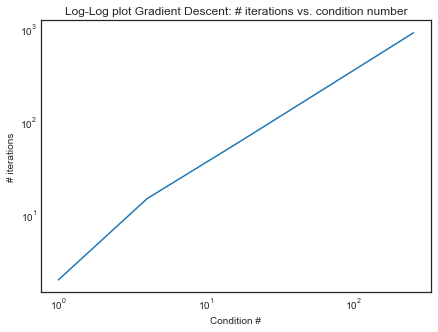

In [13]:
# m=1, therefore the condition number value is same as L
plt.figure(figsize=(7,5))
plt.xlabel("Condition #")
plt.ylabel("# iterations")
plt.title("Log-Log plot Gradient Descent: # iterations vs. condition number")
plt.loglog(L, k_GD)
plt.show()

In [14]:
# Fit linear model
X_GD = np.log10(L).reshape((-1,1)).tolist()
y_GD = np.log10(k_GD)
lr_GD = LinearRegression().fit(X_GD, y_GD)
print("X_GD: ",X_GD)
print("y_GD: ",y_GD)

#Get slope
print("Gradient Descent slope:", (lr_GD.coef_)[0])

X_GD:  [[0.0], [0.6020599913279624], [1.2041199826559248], [1.806179973983887], [2.4082399653118496]]
y_GD:  [0.30103    1.17609126 1.76342799 2.36172784 2.96142109]
Gradient Descent slope: 1.0806927660839332


In [15]:
# Defining paramters: m=1, l={1,4,16,64,256} starting at (20,20)
m = 1
L = [1,4,16,64,256]
k_HB = []
x=20
y=20

for l in L:
    k = l/m
    gamma_HB = 4/((np.sqrt(l) + np.sqrt(m))**2)
    theta_HB = ((np.sqrt(k)-1)/(np.sqrt(k)+1))**2
    
    final_iter, iter_x, iter_y, hb_count = heavy_ball(Grad_f, x, y, l, m, gamma_HB, theta_HB, 0.001, 1000)
    k_HB.append(hb_count[-1])

print("k with heavy ball: ", k_HB)

k with heavy ball:  [2.0, 10.0, 21.0, 45.0, 94.0]


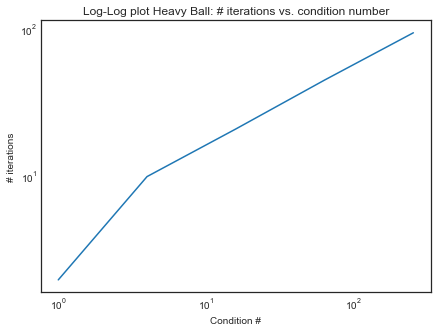

In [16]:
plt.figure(figsize=(7,5))
plt.xlabel("Condition #")
plt.ylabel("# iterations")
plt.title("Log-Log plot Heavy Ball: # iterations vs. condition number")
plt.loglog(L, k_HB)
plt.show()

The above plots have a roughly linear relationship between the log of the # of iterations required to converge and the log of the condition number. The slope of these lines, if equal to  𝛽 , will thus tell us that  number of iterations∼𝜅𝛽 . Next, approximately calculate the slope of each line by doing a simple linear regression:

In [17]:
# Fitting linear model and calculating slope
X_HB = np.log10(L).reshape((-1,1)).tolist()
y_HB = np.log10(k_HB)
lr_HB = LinearRegression().fit(X_HB, y_HB)
print("X_HB: ",X_HB)
print("y_HB: ",y_HB)

print("Heavy Ball slope:", (lr_HB.coef_)[0])
print("Gradient Descent slope:", (lr_GD.coef_)[0])
print("Ratio of the slopes for the 2 methods:", (lr_GD.coef_/lr_HB.coef_)[0])

X_HB:  [[0.0], [0.6020599913279624], [1.2041199826559248], [1.806179973983887], [2.4082399653118496]]
y_HB:  [0.30103    1.         1.32221929 1.65321251 1.97312785]
Heavy Ball slope: 0.6639551352398794
Gradient Descent slope: 1.0806927660839332
Ratio of the slopes for the 2 methods: 1.6276593232364884


Based on the ratio between the 2 slopes, we can see that the Heavy Ball method converges at a rate 1.6276593232364893 times faster than Gradient Descent.

The number of iterations for GD to converge to an  𝜖  neighborhood scales linearly in the condition number, as expected (since the slope is basically  1). The momentum resulted in a smaller slope: in theory, this is supposed to be  1/2, but since the above emulates finite-size effects above since  𝜖  is not arbitrarily small. According to our plot above, the "guess" that it takes  𝑂(𝜅2/3log(‖𝑤0−𝑤∗‖22/𝜖))  to converge to an  𝜖 -optimal solution.